<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/3/37/Plotly-logo-01-square.png/1200px-Plotly-logo-01-square.png" width="25%" height="25%" />

# Plotly - Unit 04 - Plots: Part 03

## <img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%202%20-%20Unit%20Objective.png"> Unit Objectives

In this unit we will explore and learn multiple use cases in Plotly to deliver:

* Map box
* Sun burst
* Tree Map
* Waterfall chart
* Additional considerations when using Plotly



---

## <img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%204%20-%20Import%20Package%20for%20Learning.png"> Import Package for Learning

import numpy as np
import pandas as pd
import plotly.express as px

---

## <img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%2010-%20Lesson%20Content.png"> Plotly Plots: Part 03

<img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%207-%20Note.png"> In this section, we will present the last set of Plotly charts and will deliver
* Map box
* Sun burst
* Tree Map
* Waterfall chart

---

### <img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%2010-%20Lesson%20Content.png"> Map box

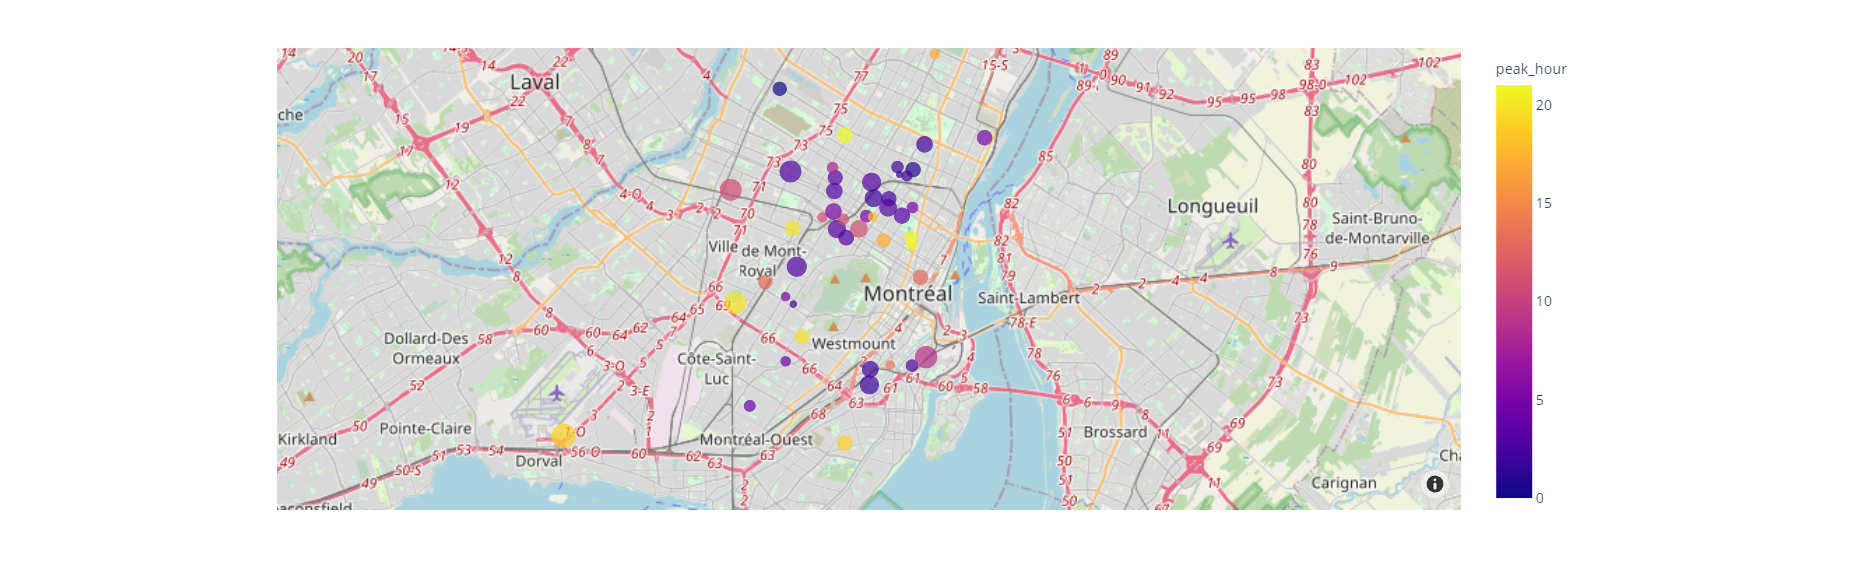

<img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%207-%20Note.png"> There are datasets that contain geolocation information, like longitude and latitude. An effective way to understand it is to plot it in a map, where each dot represents the latitude and longitide. 
* Typically you will be interested to show a continuous value as the size of the data point. You could also color the data point either using a categorical or numerical value. On top of that, you can animate the plot if your data consider time series information. These are considerations, but all will boil down to figure out which behaviour you want to understand

Consider the following dataset
* It has records for the availability of car-sharing services near the centroid of a zone in Montreal over a month-long period

df = px.data.carshare()
df = df.sample(n=50, random_state=1)
df.head()

We can use `px.scatter_mapbox()`, to plot a map considering the latitutde and longitude the. The function documentation is [here](https://plotly.github.io/plotly.py-docs/generated/plotly.express.scatter_mapbox.html). The arguments are:
* `data_frame` as the data, `lat` and `lon` as latitude and longitude,`color` and `size` as color and size of the dots.
* The color options can be found with the command `px.colors.sequential.swatches()` and you set with the argument color_continuous_scale.
* `size_max` and `zoom` sets the max dot size and the map zoom. We set as 15 and 10, but this is more a try and error exercise
* `mapbox_style` is a critical parameter, it sets the style of the plot. In case you don't set, the plot may not be rendered. You may find other options in the documentation.


Once you render the figure, you can naturally zoom in and out, move around the map, hover over the datapoints.


fig = px.scatter_mapbox(data_frame=df, lat="centroid_lat", lon="centroid_lon", color="peak_hour", size="car_hours",
                        mapbox_style='open-street-map', #### don't foret this argument :)
                        color_continuous_scale="plasma",
                        size_max=15, zoom=10)
fig.show()

<img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%205%20-%20Practice.png"> **PRACTICE** : We will use the DataFrame below, which uses the US cities dataset to practice with.

df_practice = pd.read_csv("https://raw.githubusercontent.com/Code-Institute-Solutions/sample-datasets/main/2014_us_cities.csv")
df_practice = df_practice.sample(n=70, random_state=1)

print(df_practice.shape)
df_practice.head()

Create a scatter mapbox where color and size should be pop. when you hover the mouse, name should appear. Try size_max=30 and zoom=2

# write your code here

---

### <img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%2010-%20Lesson%20Content.png"> Sunburst

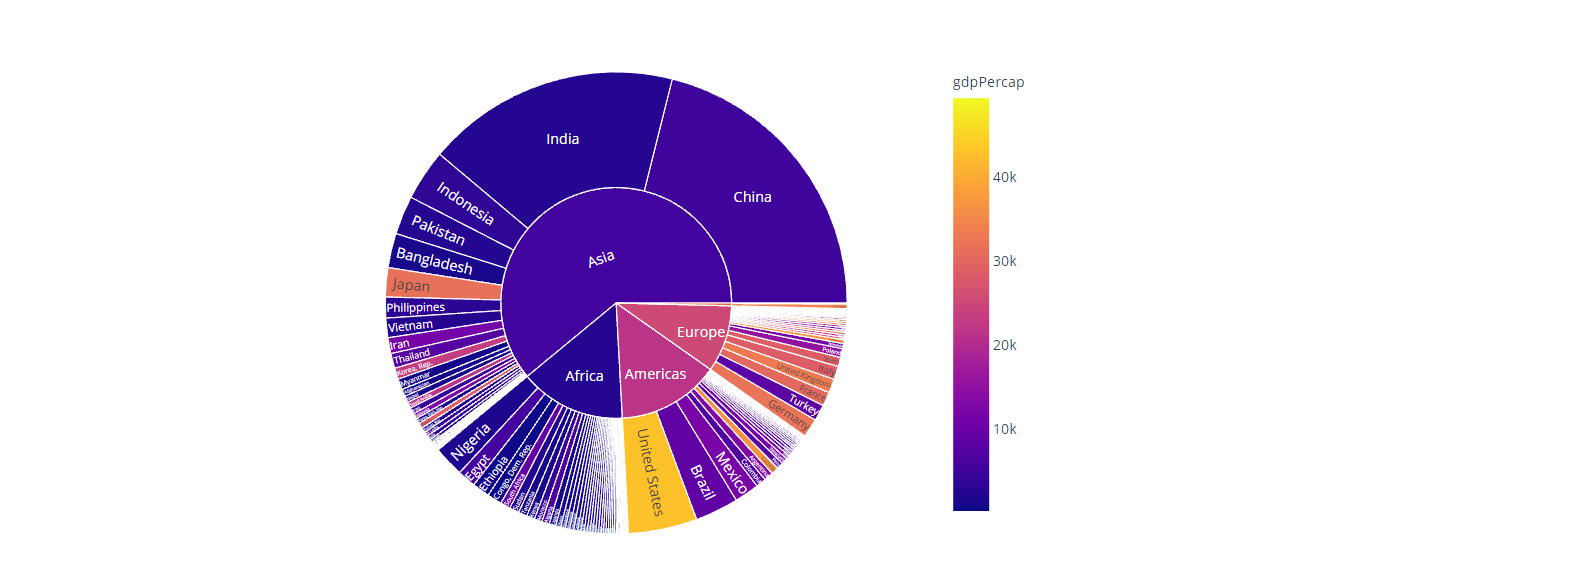

<img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%207-%20Note.png"> According to Plotly [documentation](https://plotly.com/python/sunburst-charts/), Sunburst plots visualize hierarchical data spanning outwards radially from root to leaves. The root starts from the center and children are added to the outer rings.
* It shows the relation of Part to Whole. Here you are interested to understand how the interact, and what are their proportions to each other

* It is interesting when you have multiple categorical variables and want to visualize proportions or counts for numerical variables. You can color either with a numerical or categorical variable

Consider the dataset
* It has records on population, Gross Domestic Product, life expectancy for more than 140 countries.Each row represents a country on a given year. We consider that for 2007 for this exercise

df = px.data.gapminder().query("year == 2007")
print(df.shape)
df.head()

We use `px.sunburst()` to create a sun burst. The documentations is [here](https://plotly.com/python-api-reference/generated/plotly.express.sunburst.html). The arguments are:
* data_frame for the data. path is the hierarchy of sectors, values defines each sector size. color gives color to each sector. hover_name and hover_data are arguments we are already familiar, and show additional information when we hove over the sectors
* Click in a given continent to drill down. Click it back in the same area to zoom back out
* The values shown when you hover over a continent are the sum. For example, in Asia you see 3.81 bi



fig = px.sunburst(data_frame=df, path=['continent', 'country'], values='pop',
                  color='gdpPercap', hover_name='iso_alpha', hover_data=['lifeExp'])
fig.show()

---

### <img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%2010-%20Lesson%20Content.png"> Tree Map

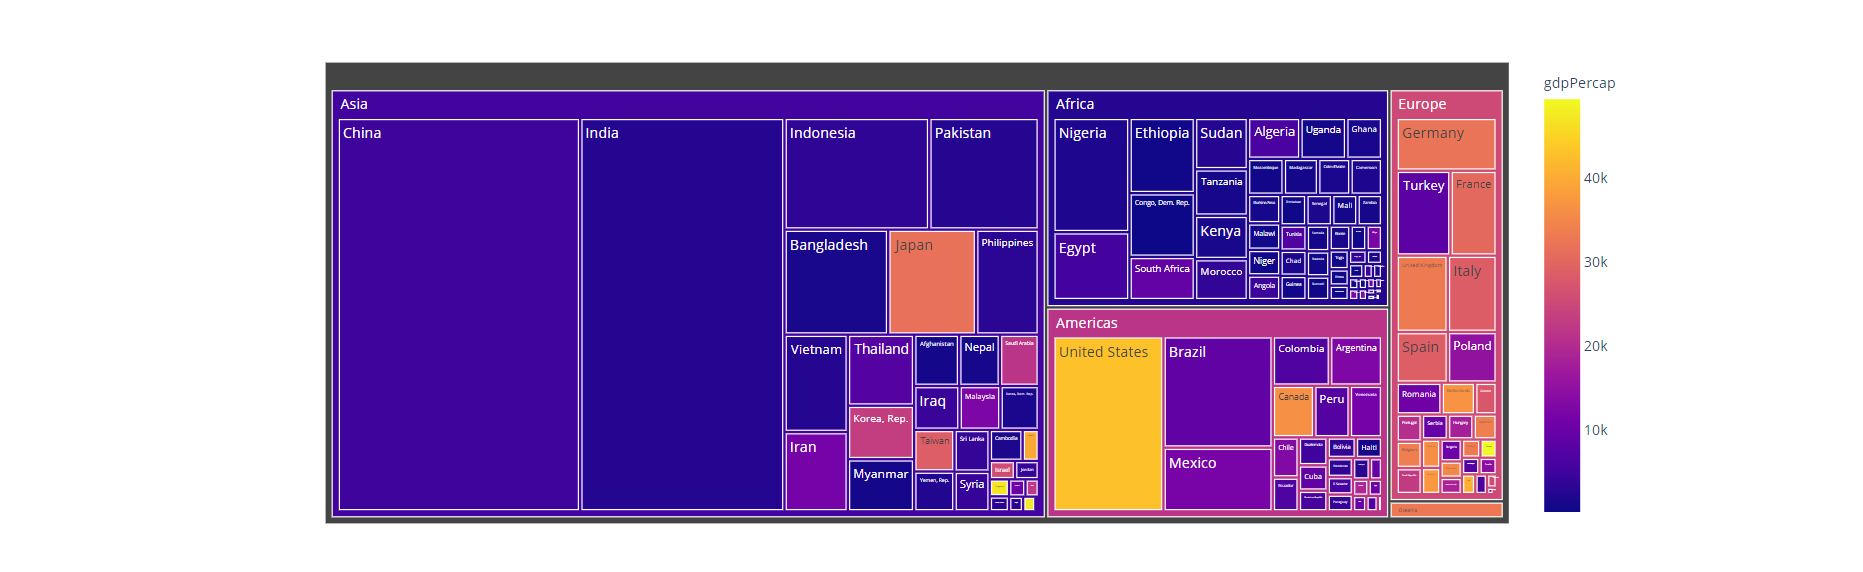

<img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%207-%20Note.png"> A Tree map also shows part to whole, but in a different manner compared to the Sunburst. It shows hierarchical data using nested rectangles instead.

Consider the dataset
* It has records on population, Gross Domestic Product, life expectancy for more than 140 countriesEach row represents a country on a given year. Again, we consider data from 2007

df = px.data.gapminder().query("year == 2007")
print(df.shape)
df.head()

We will use `px.treemap()` to plot a tree map. The documentation is [here](https://plotly.com/python-api-reference/generated/plotly.express.treemap.html). The arguments we use here are the same from sunburst,

fig = px.treemap(data_frame=df, path=['continent', 'country'], values='pop',
                  color='gdpPercap', hover_name='iso_alpha', hover_data=['lifeExp'])
fig.show()

In this particular plot, we can consider one difference on path argument, where in the list we created a constant (in this case, a string World) to represent the biggest rectangle that is embracing everything. 
* Note it is positioned as the first item in the list 

fig = px.treemap(data_frame=df, path=[px.Constant('World'), 'continent', 'country'], values='pop',
                  color='gdpPercap', hover_name='iso_alpha', hover_data=['lifeExp'])
fig.show()

<img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%205%20-%20Practice.png"> **PRACTICE** : We will use the DataFrame below, which uses the sales sucess dataset to practice with. It shows records for sales person performance (calls and sales) and their territory (region, county)

df_practice = pd.read_csv("https://raw.githubusercontent.com/Code-Institute-Solutions/sample-datasets/main/sales_success.csv")
df_practice = df_practice.sample(n=50, random_state=1)
print(df_practice.shape)
df_practice.head(3)

Do a tree plot, where the path is region, county and salesperson. values and color shall be sales and when you hover over, the calls should appear
* Visually speaking, in which region do you tend to see more sales? And less? And in which counties?

# write your code for tree map

Now create a sunburst chart using the same dataset. Which one do you find more effective to understand the data?

# write your code for sunburst

---

### <img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%2010-%20Lesson%20Content.png"> Waterfall

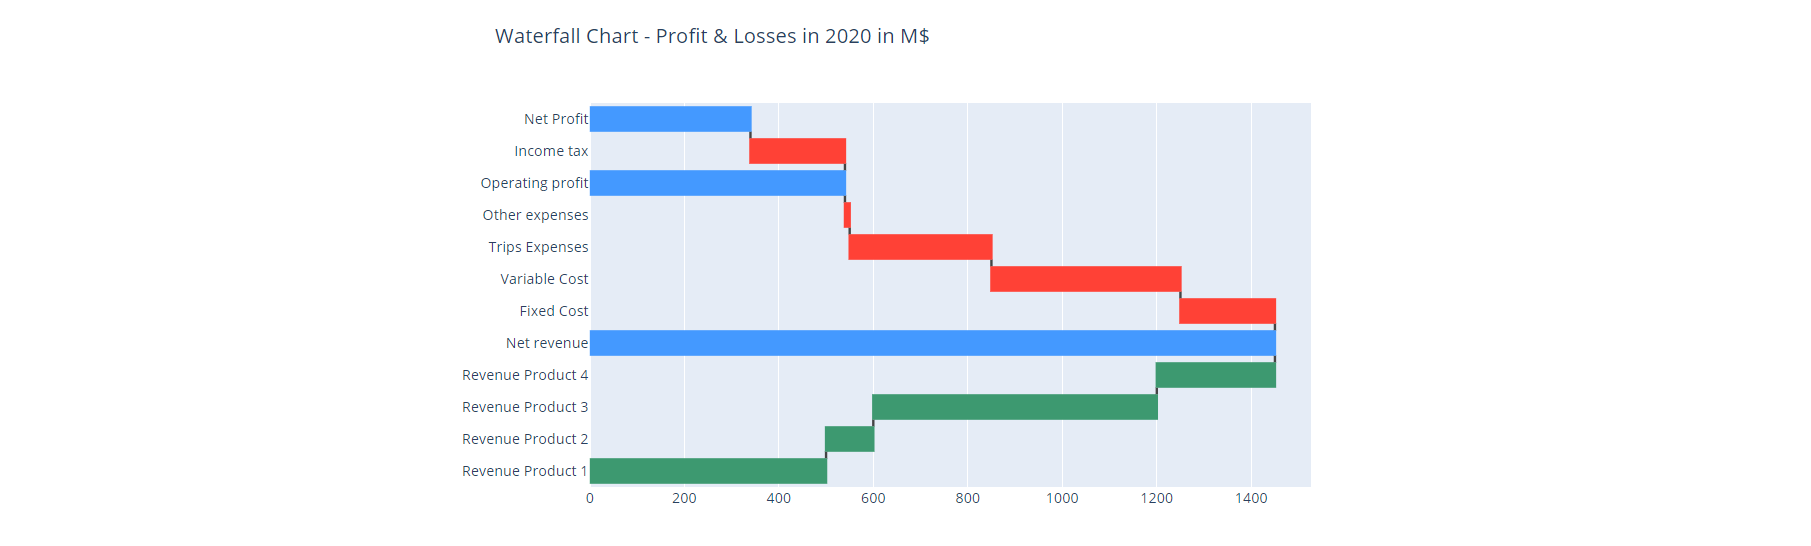

<img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%207-%20Note.png"> A Waterfall chart aims to demonstrate the cumulative effect of sequential added values. It is commonly used in finance





Imagine if your company are interested in creating a waterfall chart displaying the annual Profit and Losses. 
* Your company has revenue from 4 products. It has costs, expenses and pays tax. 

Consider the fictitious data below (in the workplace, this dataset likely would come from a processed report)
* In this exercise someone from your company prepared the data already in the format below, where the DataFrame index has the report item (like Revenue, Cost, Profit etc) and the column Value holds the amount for a particular item.
* `.T` transpose the rows and columns of your DataFrame

df = pd.DataFrame({"Revenue Product 1": [500],
                   "Revenue Product 2": [100],
                   "Revenue Product 3": [600],
                   "Revenue Product 4": [250],
                   "Net revenue": [1450], 
                   "Fixed Cost": [-200],
                   "Variable Cost": [-400],
                   "Trips Expenses": [-300],
                   "Other expenses": [-10],
                   "Operating profit": [540],
                   "Income tax": [-200],
                   "Net Profit": [340]},
              index=['Value'])

df = df.T  # .T transpose the rows and columns
df


<img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%207-%20Note.png"> In this particular chart, we are using another module from Plotly, called Plotly Graph Objects, or the common alias, `go`
  * Currently Plotly Express doesn't have this capability for Waterfall chart


The documentation for Waterfall Charts in Plotly is found [here](https://plotly.com/python/waterfall-charts/) and the documentation for Plotly GraphObjects is found [here](https://plotly.com/python/graph-objects/). The arguments we consider are:
* `orientation='h'`, for horizontal
* `measure`, you will know how many values (or steps) your chart will have. For each, you need to set in a list if that will be `relative` or `total`. A relative means it is being added or subtracted in the flow, for example "Revenue Product 2" adds to the product revenues. A total simply shows the value for that step, for example, Net revenue shows the accumulated revenue for a set of products

<img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%207-%20Note.png"> You will read the plot bottom-up, starting from Revenue Product 1 until Net Profit

import plotly.graph_objs as go
fig = go.Figure(go.Waterfall(
    orientation = "h",
    measure = ["relative", "relative", "relative", "relative","total",
               "relative", "relative", "relative", "relative","total",
                "relative","total"],
    y = df.index.to_list(),
    x = df['Value']
))


fig.update_layout(title = "Waterfall Chart - Profit & Losses in 2020 in M$",
                  width=800, height=500)
# go.Waterfall() doesn't have a argument for setting width, height and title
# we set with fig.update_layout()
fig.show()

---

### <img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%2010-%20Lesson%20Content.png"> Adittional arguments consideration

<img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%207-%20Note.png"> There are additional arguments, present in almost all of the functions we covered that we often will adjust depending in our use case and projects. We will study:
* Title
* Set plot size
* Set template

---

#### <img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%2010-%20Lesson%20Content.png"> Title

Consider the dataset
* It has records on population, Gross Domestic Product, life expectancy for more than 140 countries. Each row represents a country on a given year

df = px.data.gapminder()
df = df.sample(n=50, random_state=1)
df.head(3)

You can set the title with the argument `title`

fig = px.scatter(df, x="gdpPercap", y="lifeExp", 
                 animation_frame="year", 
                 size="pop",size_max=55, 
                 color="continent", hover_name="country",
                 log_x=True, range_x=[100,100000], range_y=[25,90],
                 title='Title for this Figure!!!!'
            )

fig.show()

---

#### <img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%2010-%20Lesson%20Content.png"> Set Plot Size

You can set the plot size using width and height, the values are in pixels

fig = px.scatter(df, x="gdpPercap", y="lifeExp", 
                 animation_frame="year", 
                 size="pop",size_max=55, 
                 color="continent", hover_name="country",
                 log_x=True, range_x=[100,100000], range_y=[25,90],
                 width=600, height=350
            )

fig.show()

---

#### <img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%2010-%20Lesson%20Content.png"> Set template

You can check available templates, or themes

import plotly.io as pio
pio.templates

And use the available options on `template` argument

fig = px.scatter(df, x="gdpPercap", y="lifeExp", 
                 animation_frame="year", 
                 size="pop",size_max=55, 
                 color="continent", hover_name="country",
                 log_x=True, range_x=[100,100000], range_y=[25,90],
                 width=600, height=350,
                 template='simple_white'  ######## set template
            )

fig.show()


---